In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynadojo.systems.lds import LDSystem
from dynadojo.wrappers import SystemChecker
from dynadojo.utils.lds import plot

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

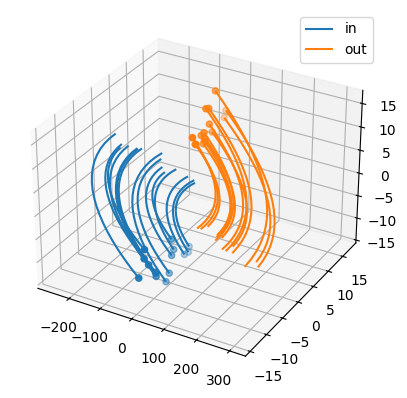

In [6]:
latent_dim = 3
embed_dim = 10
n = 15
timesteps = 20
system = SystemChecker(LDSystem(latent_dim, embed_dim, noise_scale=0, seed=2))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)
plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

x_err=8.364671076986105e-05
y_err=4.077825193739734e-05


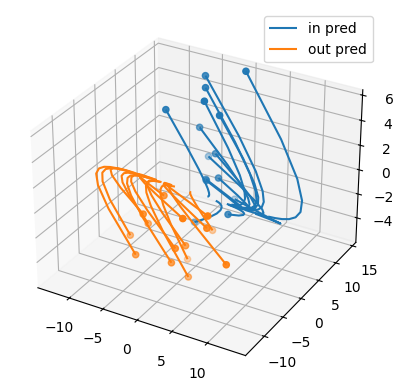

In [40]:
dmd = dd.baselines.DMD(embed_dim, timesteps, activation=None, max_control_cost=0)
dmd.fit(x)
x_pred = dmd.predict(x[:, 0], timesteps)
y_pred = dmd.predict(y[:, 0], timesteps)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")